In [132]:
import glob
import os
from readfiles import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from lomapost import * #All functions defined within module lomapost
import h5py
%matplotlib inline

In [133]:
set_fig_props()

In [134]:
from IPython.display import clear_output
from IPython.display import Image

# Job selection

#### Modify p_folders vector for job selection:

In [124]:
p_s80Big1 = '/share/drive/toni/Re160s80/caseBig1/'
opt_s80Big1 = 1 #lomacte code opt value

p_s80a = '/share/drive/toni/Re160s80/case1/'
opt_lomacte = 1

p_s80ay2 = '/share/drive/toni/Re160s80/case1/y2/'
p_s80ay2sig07 = '/share/drive/toni/Re160s80/case1/y2/sig07/'
p_s80ay2sig07b = '/share/drive/toni/Re160s80/case1/y2/sig07/bigger/'
p_s80by2sig07 = '/share/drive/toni/Re160s80/case2/y2/sig07/'
opt_lomacte = 1
p_s40ay2 = '/share/drive/toni/Re160s40/case1/y2/'
opt_lomacte = 1
p_s40by2 = '/share/drive/toni/Re160s40/case2/y2/'
p_s40cy2 = '/share/drive/toni/Re160s40/case3/y2/'


p_s20ay2 = '/share/drive/toni/Re160s20/case1/y2/'

p_s80by2 = '/share/drive/toni/Re160s80/case2/y2/'
opt_lomacte = 1
p_s80cy2 = '/share/drive/toni/Re160s80/case3/y2/'
opt_lomacte = 1

p_s40ay2sig07='/share/drive/toni/Re160s40/case1/y2/sig07/'
p_s40by2sig07='/share/drive/toni/Re160s40/case2/y2/sig07/'
p_s40cy2sig07='/share/drive/toni/Re160s40/case3/y2/sig07/'
opt_loma3 = 3
opt_lomahz=2
p_PantB = '/share/drive/toni/APS/PantBcomet/'
p_PantBLf03 = '/share/drive/toni/APS/PantBLf03/'
p_PantBLf2 = '/share/drive/toni/APS/PantBLf2/'
p_folders   = [p_PantBLf03]
#define option and styles for sta reading
l_sta_opt = [opt_lomahz]
#p_folders   = [p_results+ 'tests80', p_results+'Re160s20my1101',p_results+'Re160s40my1101'] #Define path of folders
#Option 2:  p_folders   = glob.glob(p_results+'Re160*my1101') #use pattern to define them
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1])   
    #print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_spe_files[ijob][0],l_spe_files[ijob][-1])  

['/share/drive/toni/APS/PantBLf03/']
job(1): 1st file = /share/drive/toni/APS/PantBLf03/Re5280_01_001.sta, last file = /share/drive/toni/APS/PantBLf03/Re5280_03_110.sta


In [125]:
#Total number of files for every job
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
    #nfiles2[ijob] = len(l_spe_files[ijob])
print nfiles


[131]


# Read all data

### STA files

In [126]:
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])

# CREATE HDF5 WITH ALL STATS

In [127]:
#for every job in l_folders:

for ijob in range(njobs):
    print ijob
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = workstaHZ(fsta,2) #save the stats on the right place
        stats[ijob].append(temp)

0


In [128]:
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']

In [129]:
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point

['dyeta', 'wrms', 'llambda', 'w1rms', 'rvm', 'chi', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'Tm', 'epNH', 'XI', 'Zrms', 'vm', 'Hrms', 'num', 'vrms', 'R12', 'R11', 'Hp', 'Hm', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Zm', 'Trms', 'k', 'w2m', 'R22', 'eta', 'Zp', 'TT']
['EPS', 'dm2', 'Relambda', 'dm', 'dmU', 'dw', 'dmpoint', 'etamin', 'dw2', 'time']


In [130]:
CHECK = True #Flag for activating plots

In [131]:
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm2':
                vdm  = np.array(v_temp)
            if variable=='dw2':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

my=801
Writing alp = [ 0.20268001], for ijob = 0
Writing bet = [ 0.78539997], for ijob = 0
Writing Re = [ 5280.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing dm2
Writing Relambda
Writing dm
Writing dmU
Writing dw
Writing dmpoint
Writing etamin
Writing dw2
Writing time


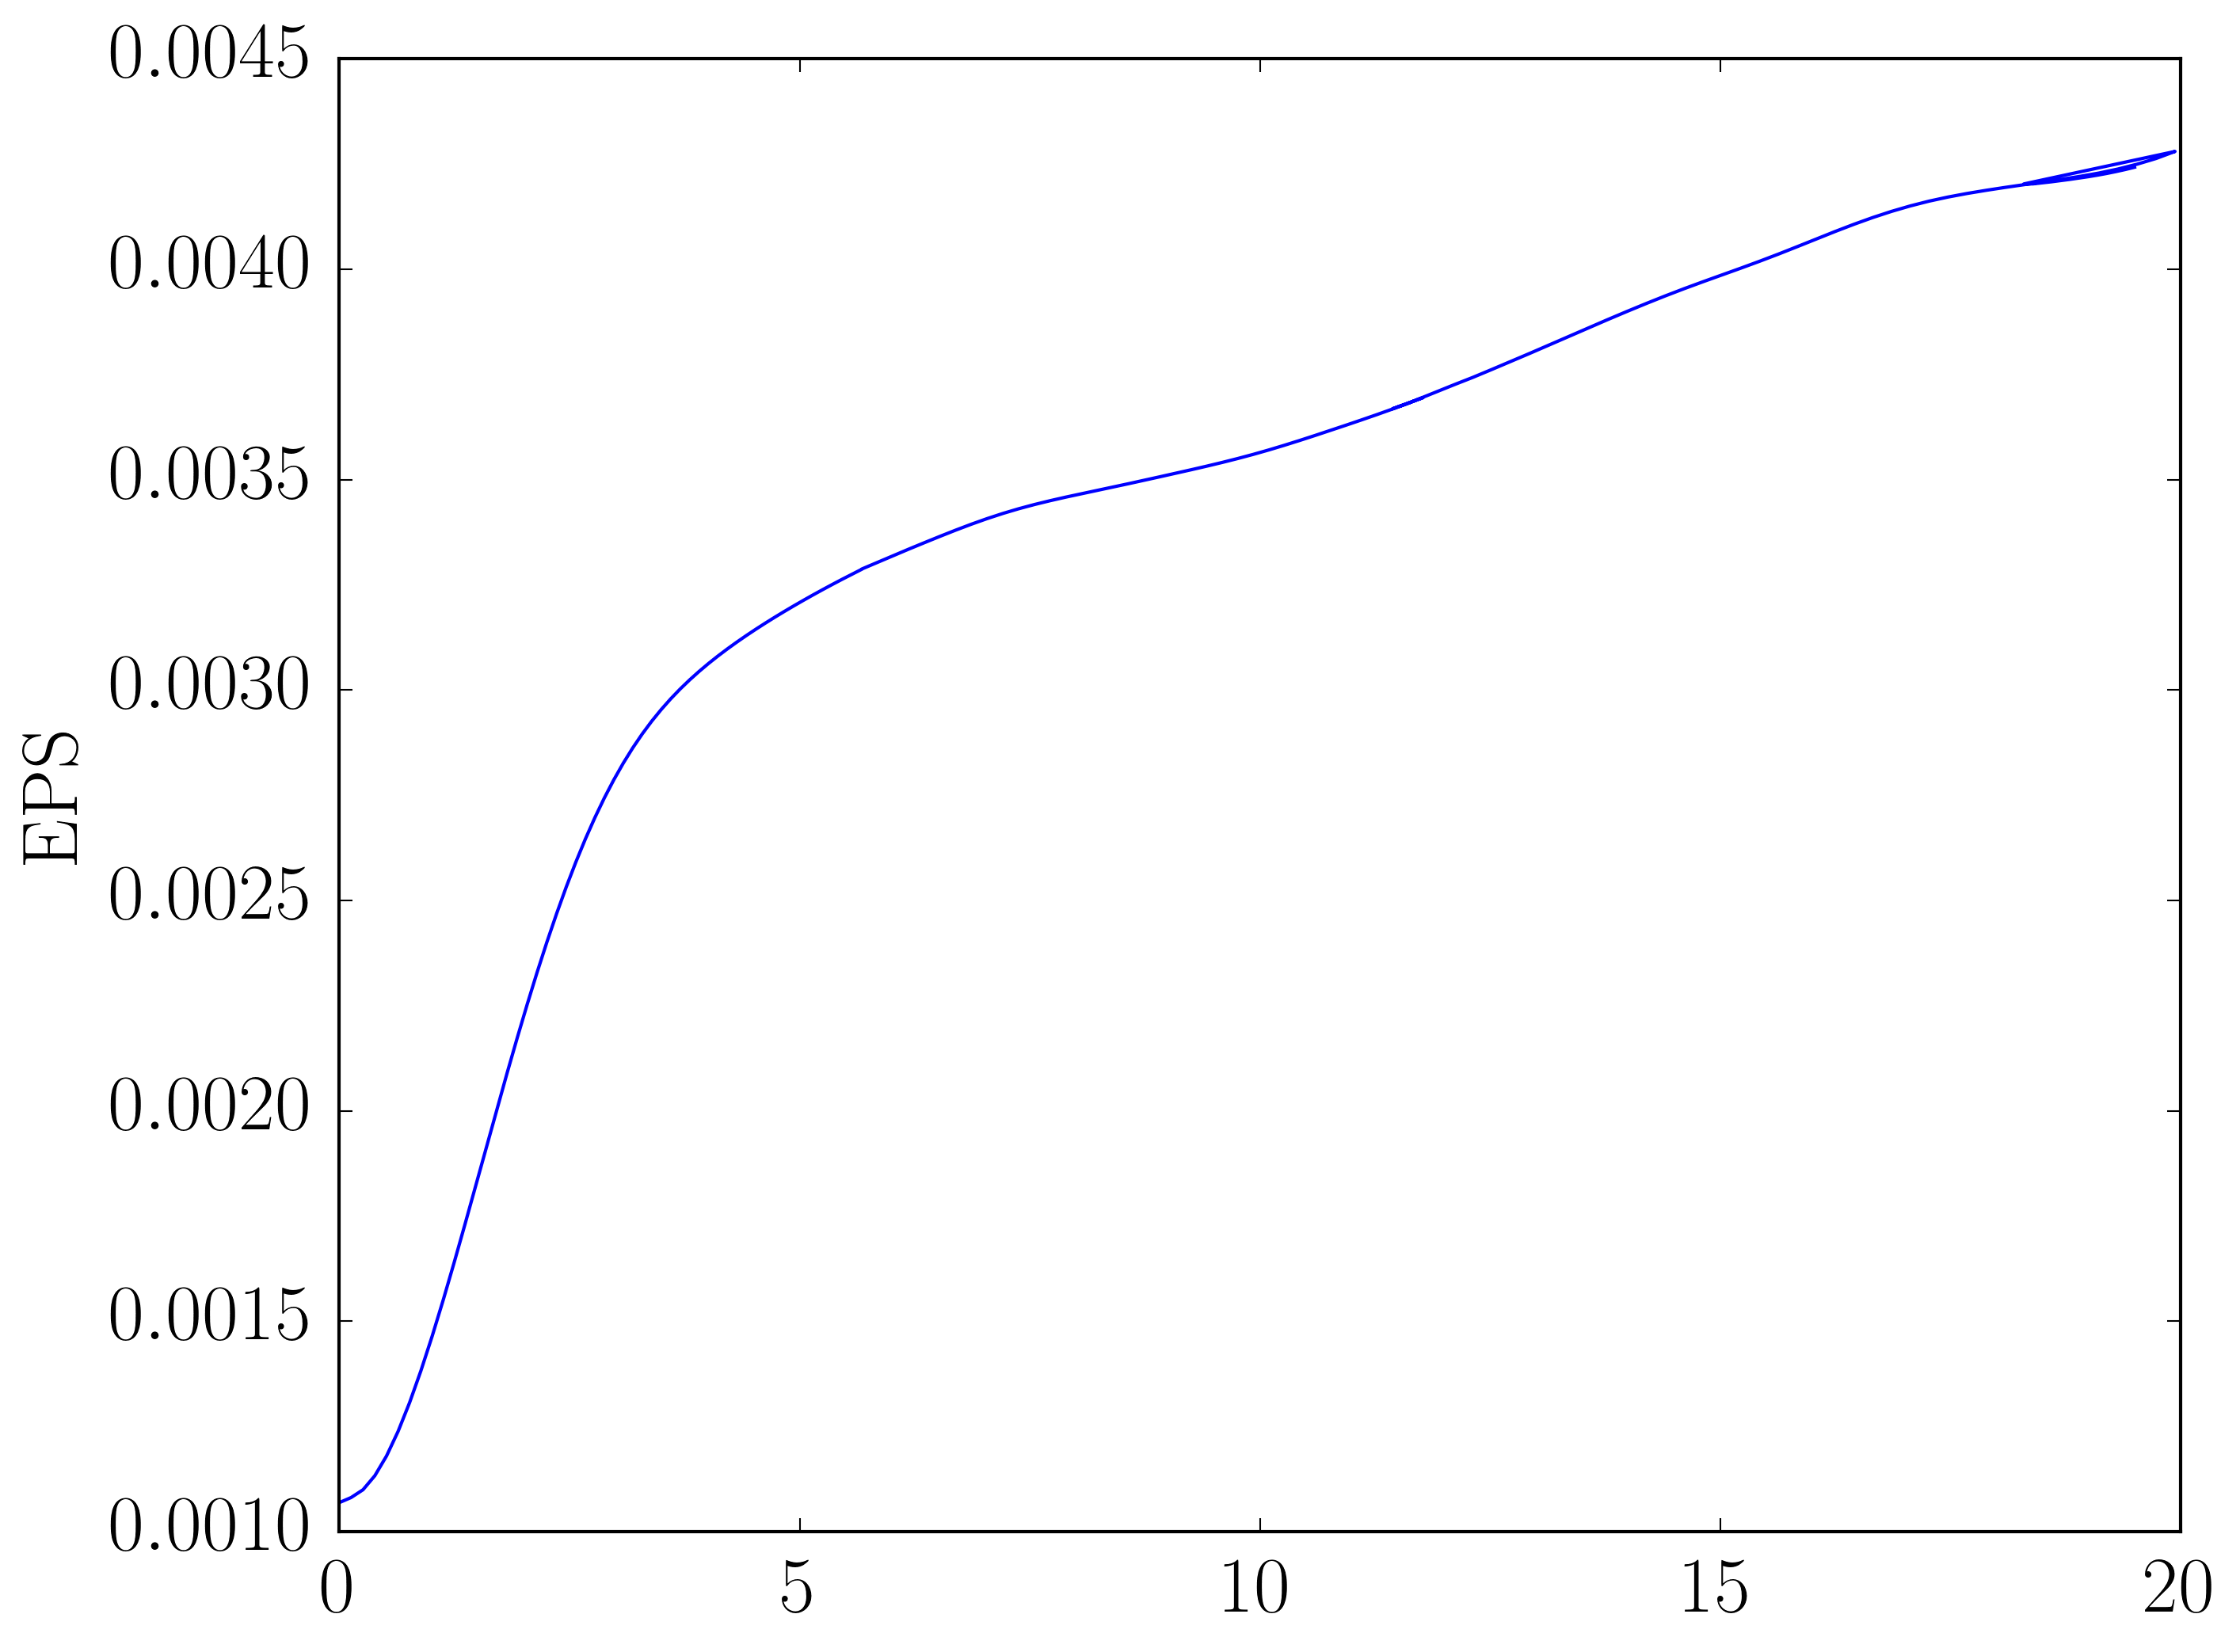

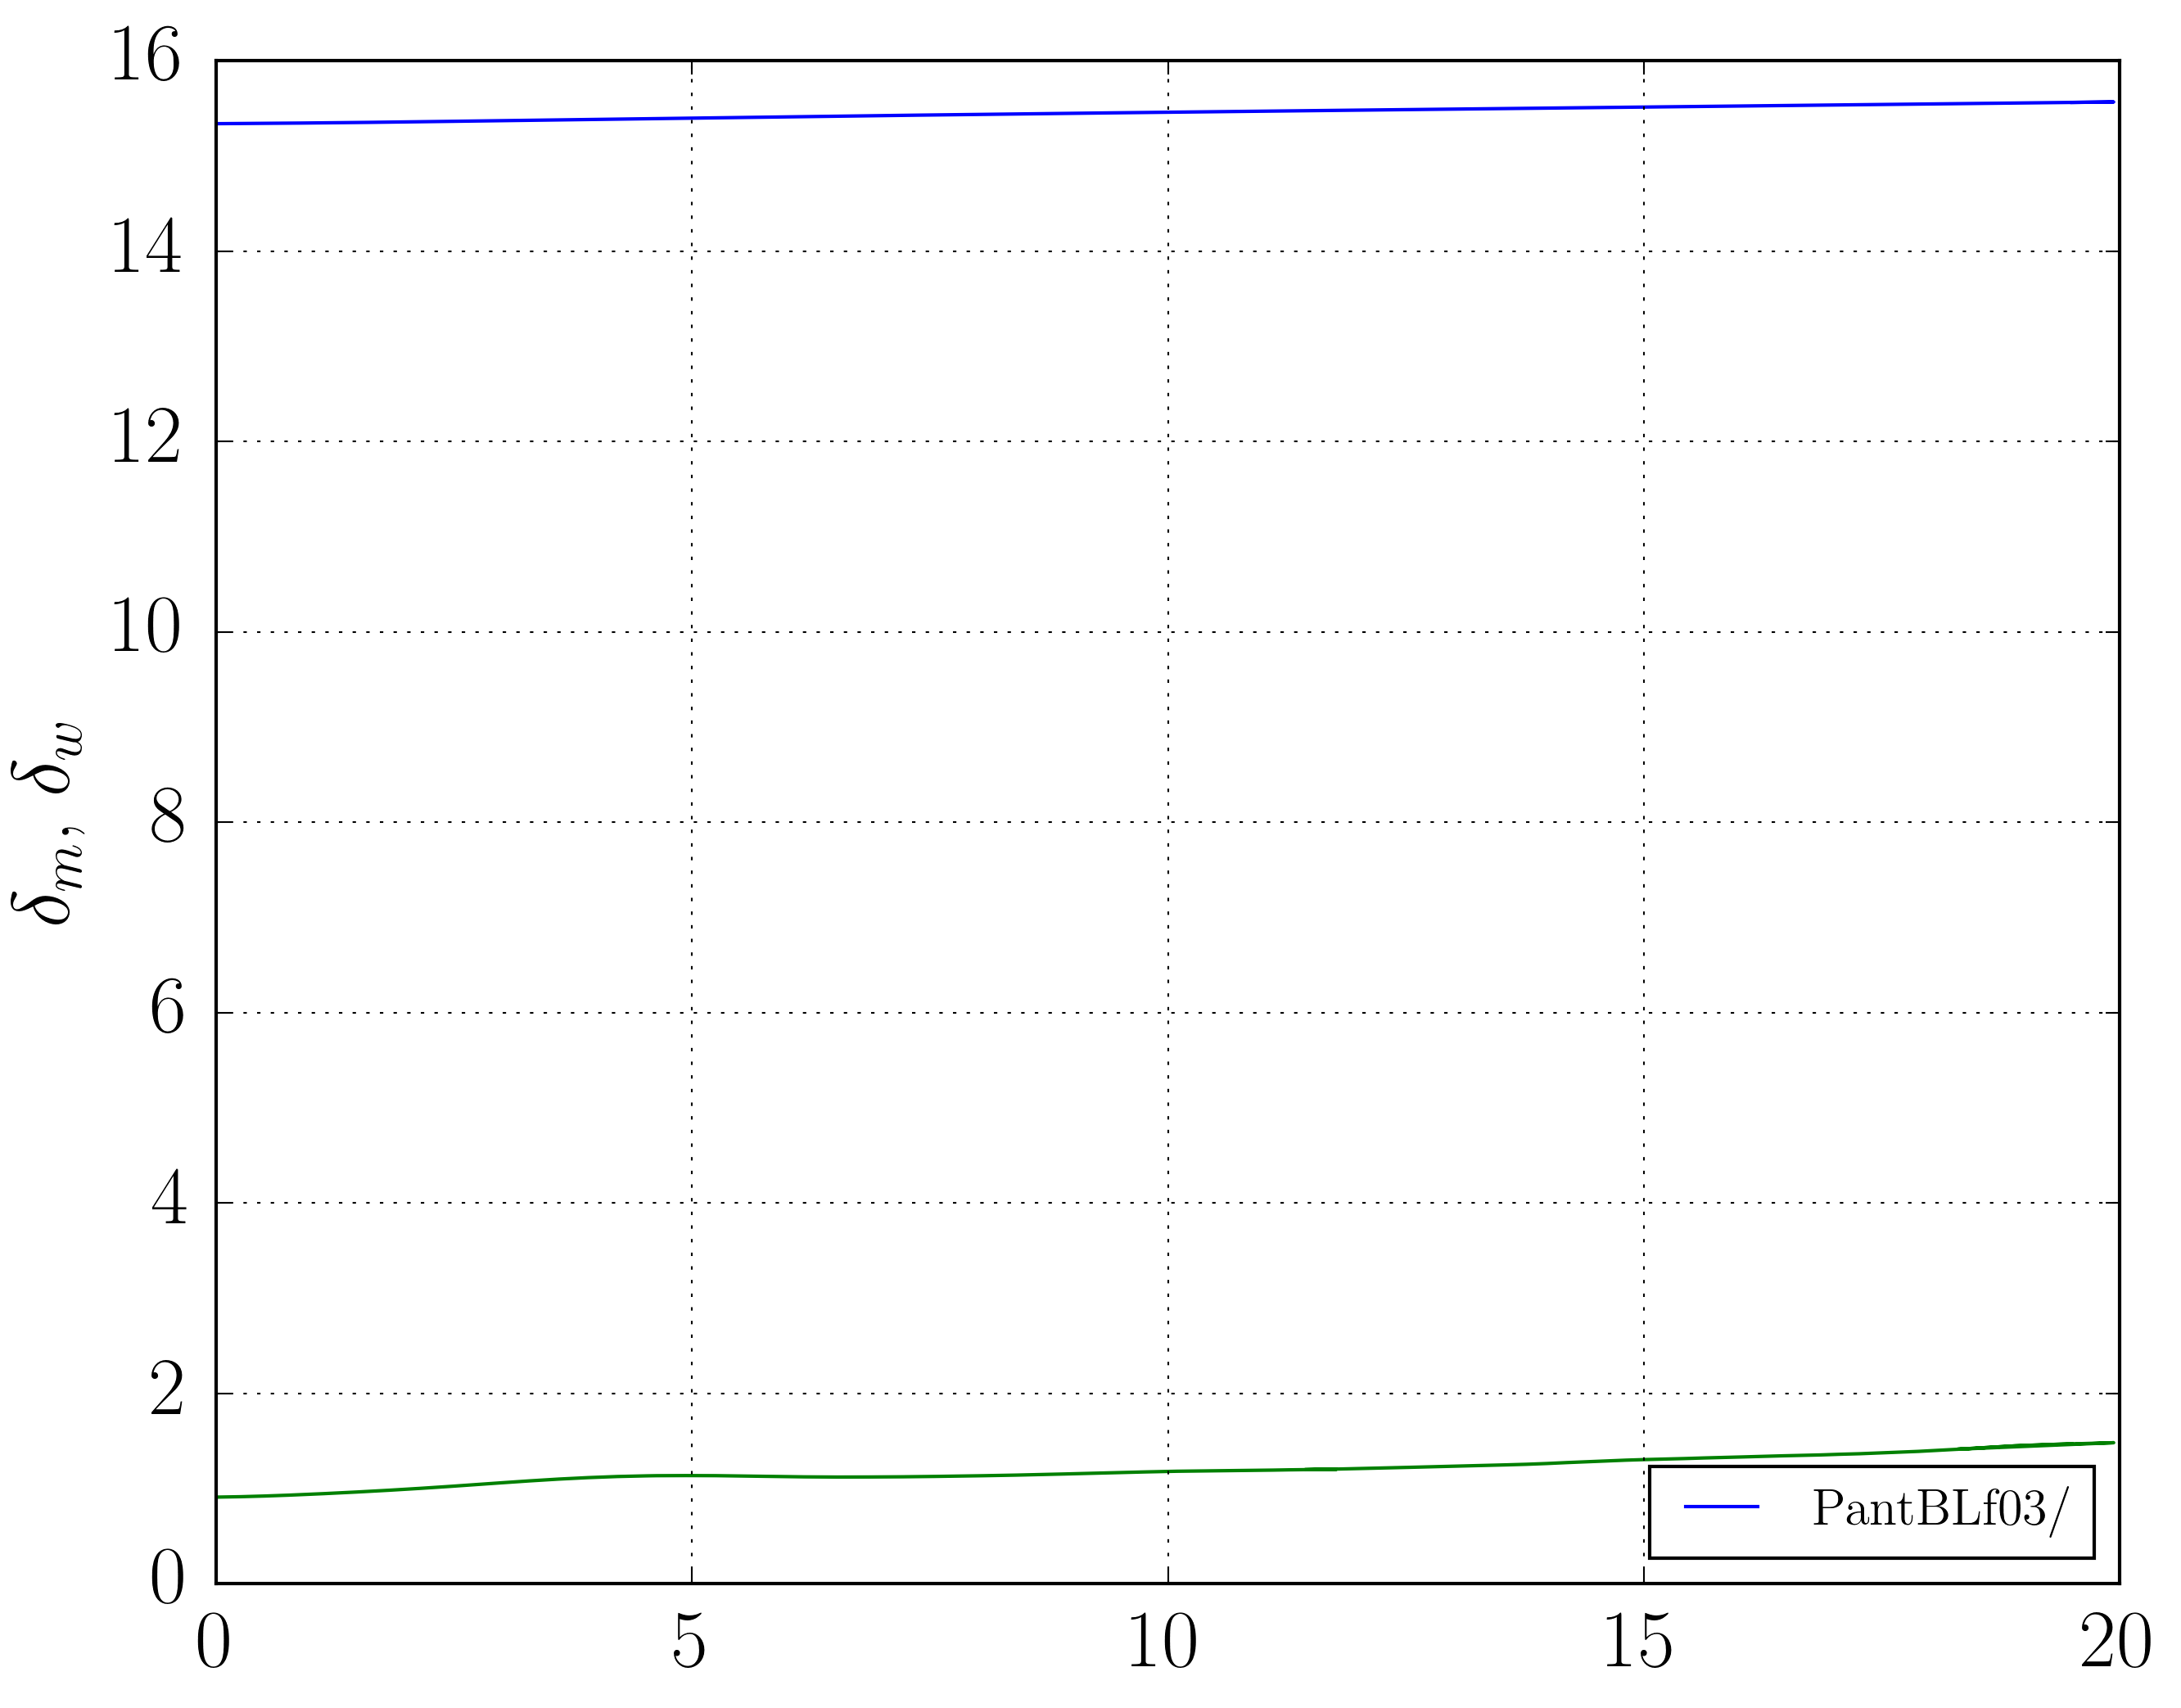

In [120]:
if CHECK==True:
    fig1 = plt.figure()
    fig2 = plt.figure()        
    ax2 = fig2.add_subplot(111)
    ax2.plot(vtime,vdm,label=p_folders[ijob][-10:])
    ax2.plot(vtime,vdw)
    ax2.set_ylabel(r'$\delta_m$, $\delta_w$')
    plt.grid('on')
    plt.legend(loc=4,prop={'size':15})
        #Plots
    ax1 = fig1.add_subplot(111)
    ax1.plot(vtime,vEPS,label=p_folders[ijob][-10:])
        #ax1.plot(vtime,vLambda,label=p_folders[ijob][-10:])
    ax1.set_ylabel("EPS")
    plt.grid('on')
    plt.legend(loc=4,prop={'size':15})
    plt.gca().set_ylim(bottom=0)